<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-in-the-concentration-dataset" data-toc-modified-id="Read-in-the-concentration-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in the concentration dataset</a></span></li><li><span><a href="#Set-the-pallete" data-toc-modified-id="Set-the-pallete-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Set the pallete</a></span></li><li><span><a href="#Make-a-pair-of-plots" data-toc-modified-id="Make-a-pair-of-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Make a pair of plots</a></span></li></ul></div>

# Repeat the colormap example with separate colorbars

Same approach as with the colormap_example notebook, but make a separate 
colorbar for each subplot

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import context

setting context.cookbook_dir to /Users/phil/repos/eosc213_students/notebooks/cookbook_examples


## Read in the concentration dataset

In [2]:
cp = np.load(context.cookbook_dir / "colormap_data.npz")
x, y, c = cp["x"], cp["y"], cp["c"]

## Set the pallete

In [3]:
pal = plt.get_cmap("RdYlBu").reversed()
pal.set_bad("0.75")  # 75% grey for np.nan (missing data)
pal.set_over("xkcd:white")  # color cells > vmax white
pal.set_under("xkcd:teal")  # color cells < vmin teal
vmax = 1.5
vmin = 0.2
the_norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax, clip=False)

## Make a pair of plots

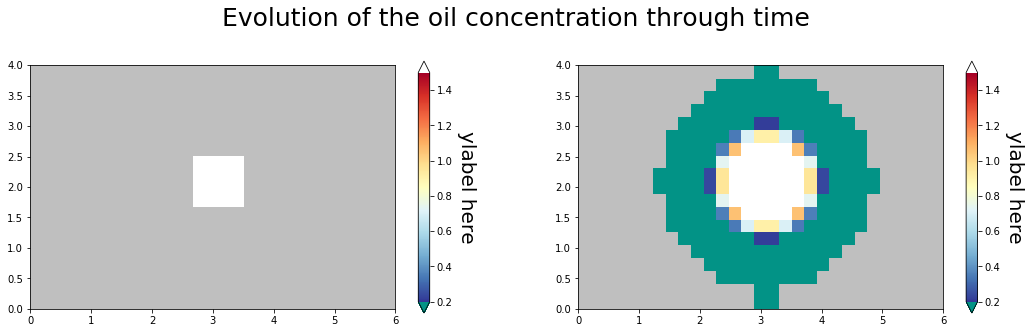

In [4]:
#
# copy the data array for safety
#
plot_c = np.array(c)
plot_c[plot_c < 1.0e-4] = np.nan
m2km = 1.0e-3
time_steps = np.array([0, 1])
nfig = len(time_steps)
fig, grid = plt.subplots(1, 2, figsize=(18, 10))
ntimesteps = len(time_steps)

for time_index, the_ax in zip(time_steps, grid.flat):
    im = the_ax.pcolormesh(
        x * m2km, y * m2km, plot_c[:, :, time_index], norm=the_norm, cmap=pal
    )
    the_ax.set_aspect(1)
    cax = fig.colorbar(im, ax=the_ax, extend="both", shrink=0.5)
    cax.set_label("ylabel here", rotation=270, va="bottom", size=20)
    fig.subplots_adjust(bottom=0.1, top=0.8)

# cax = fig.add_axes([0.92, 0.1, 0.025, 0.55], frameon=False)
# cbar = matplotlib.colorbar.Colorbar(cax, im, extend="both")
# cbar.ax.set_ylabel("Concentration ($kg/m^3$)", rotation=270, size=20, va="bottom")
fig.suptitle(
    "Evolution of the oil concentration through time", y=0.7, size=25, va="top"
)
fig.savefig("Oil_Concentration_Evolution.png")